In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [2]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False, #this is for not including the dense layers
    input_shape=(150,150,3)
)

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d6bbae143d832006294945121d1f1fc so we will re-download the data.
58889256/58889256 [==============================] - 13s 0us/step


In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [4]:
model=Sequential()

In [5]:
model.add(conv_base);
model.add(Flatten());
model.add(Dense(256,activation='relu'));
model.add(Dense(64,activation='relu'));
model.add(Dense(1,activation='sigmoid'));

In [6]:
conv_base.trainable=False

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,828,609
Trainable params: 2,113,921
Non-trainable params: 14,714,688
_________________________________________________________________


In [20]:
train_ds=keras.utils.image_dataset_from_directory(
    directory="images/train",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.


In [21]:
val_ds=keras.utils.image_dataset_from_directory(
    directory="images/test",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

Found 5000 files belonging to 2 classes.


In [22]:
def process(image,label):
    image=tensorflow.cast(image/255.0,tensorflow.float32)
    return image,label

In [23]:
train_ds=train_ds.map(process);
val_ds=val_ds.map(process);

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']);

In [27]:
history=model.fit(train_ds,epochs=10,validation_data=val_ds);

Epoch 1/10
625/625 [==============================] - 120s 177ms/step - loss: 0.2669 - accuracy: 0.8859 - val_loss: 0.2083 - val_accuracy: 0.9132
Epoch 2/10
625/625 [==============================] - 109s 174ms/step - loss: 0.1971 - accuracy: 0.9166 - val_loss: 0.2060 - val_accuracy: 0.9124
Epoch 3/10
625/625 [==============================] - 109s 175ms/step - loss: 0.1634 - accuracy: 0.9324 - val_loss: 0.2345 - val_accuracy: 0.9078
Epoch 4/10
625/625 [==============================] - 109s 175ms/step - loss: 0.1335 - accuracy: 0.9445 - val_loss: 0.2480 - val_accuracy: 0.9128
Epoch 5/10
625/625 [==============================] - 109s 174ms/step - loss: 0.1043 - accuracy: 0.9583 - val_loss: 0.2823 - val_accuracy: 0.9042
Epoch 6/10
625/625 [==============================] - 109s 174ms/step - loss: 0.0819 - accuracy: 0.9673 - val_loss: 0.3089 - val_accuracy: 0.9120
Epoch 7/10
625/625 [==============================] - 111s 177ms/step - loss: 0.0669 - accuracy: 0.9736 - val_loss: 0.3468 -

In [32]:
import matplotlib.pyplot as plt

In [34]:
model.save("catvdogbyfeature.keras")

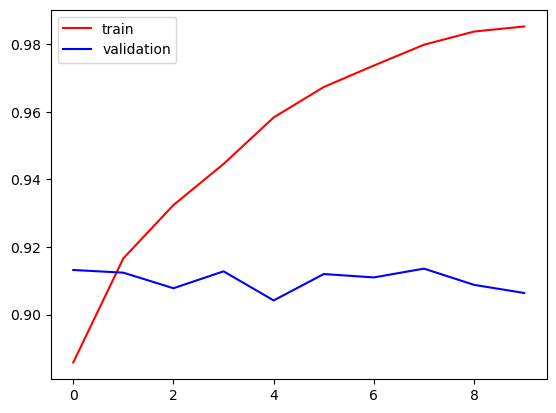

In [35]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [41]:
paths=["Downloads/images.jpg",
      "Downloads/images1.jpg",
      "Downloads/indian dog.jpg"]

1/1 [==============================] - 1s 1s/step


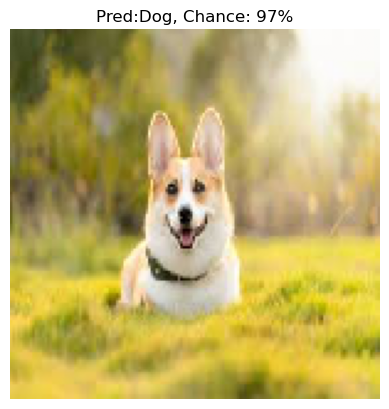

1/1 [==============================] - 0s 24ms/step


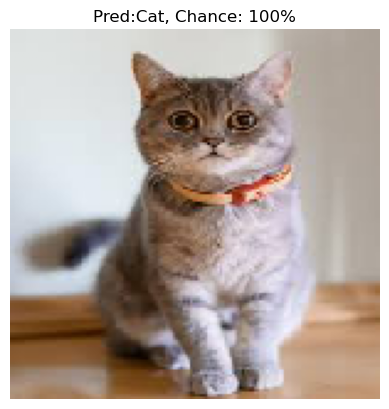

1/1 [==============================] - 0s 25ms/step


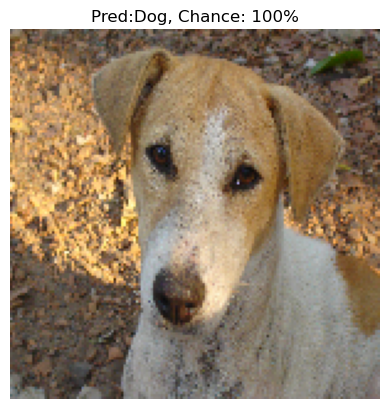

In [43]:
for path in paths:
    img = keras.utils.load_img(path, target_size=(150,150))
    img = keras.utils.img_to_array(img)
    img=img/255.0;
    test_input=img.reshape((1,150,150,3));
    pred=model.predict(test_input);
    plt.imshow(img)
    conf=pred;
    if conf>0.5:
        prediction="Dog";
    else:
        prediction="Cat";
        conf=1-conf;
    conf=int(conf*100);
    plt.title(f"Pred:{prediction}, Chance: {conf}%")
    plt.axis("off")
    plt.show()